In [1]:
import pandas as pd
import spline
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from merge_script import modify_first_column
import math
from sklearn.decomposition import PCA
import glob
import Calculate_Feature
import os
from spline import np_move_avg


def use_pca(featuer_data, n_components=5):
    pca = PCA(n_components)
    axis_fea = pca.fit_transform(featuer_data)  # 每个样本降为n_components维
    fea = []
    for raw in range(axis_fea.shape[0]):
        for ele in axis_fea[raw, :]:
            fea.append(ele)
    return fea


def axis_normalization(datalist, stage=1):
    normalized_data = []
    #datalist = np.array(datalist)
    for data in datalist:
        maximum = max(data)
        minimum = min(data)
        # print("maximum is:",maximum,"minimum is:",minimum)
        normalized_data.append([(item - minimum) / (maximum - minimum) * stage for item in data])
    return np.array(normalized_data)


def three_fuse(data):
    axis_num = int(data.shape[0] / 3)
    f_nd = []

    for f_in in range(axis_num):
        nd = []
        index = f_in * 3
        for i in range(data.shape[1]):
            d = data[:, i]
            fuse_data = math.sqrt(d[index] * d[index] + d[index + 1] * d[index + 1] + d[index + 2] * d[index + 2])
            nd.append(fuse_data)
        f_nd.append(nd)
    return f_nd

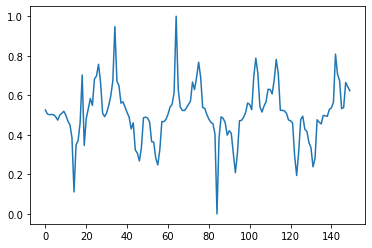

In [42]:
virtural_data_path = 'save_data/Virtual_Seg_byScale/0.8/ankle/ankle-1.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
nor_df = axis_normalization(df)
plt.plot(nor_df[0][0:150])
# plt.plot(nor_df[1][100:400])
# plt.plot(nor_df[2][100:400])

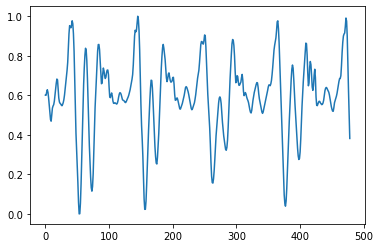

In [41]:
# virtural_data_path = 'save_data/Virtual_Seg_byScale/0.8/ankle/ankle-1.csv'
# df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols= [12,13,14])
# df = np.array(df).T
# nor_df = axis_normalization(df)
# plt.plot(nor_df[0][:400])
real_data_path = 'save_data/RealData_Seg_byName/Effy/ankle/ankle-1.csv'
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
nor_df = axis_normalization(df)
plt.plot(nor_df[0][:480])
# plt.plot(nor_df[1][100:400])
# plt.plot(nor_df[2][100:400])

# Position求二次导

In [56]:
temp_data = []
test_data_path = 'save_data/ori_Vitural_NewData/ankleTap/pos/ankleTap_m_pos_merge_data.csv'
# test_data_path = 'save_data/Vitural_NewData/scale_motion_1.1merge/pos/ankle_m_pos_merge_data.csv'
modify_first_column(test_data_path)
df = pd.read_csv(test_data_path, header=None, index_col=False)
df = np.array(df).T
time_list = df[0, :]
for index in range(df.shape[0] - 2):
    # for index in range(data.shape[0]):
    # x = data[:,index+2]
    x = df[index + 2, :]
    # print(x)
    # print(x)
    second_pos = spline.spline_cal(time_list, x.tolist(), 1)
    re_x = second_pos.second_derivate()

    temp_data.append(re_x[10:len(re_x) - 10])  # 去掉头尾
temp_data = np.array(temp_data)
write_path = "save_data/pos_save_temp/test_pos_ori.csv"
with open(write_path, mode="w", encoding="utf-8", newline='') as f:
    csv_writer = csv.writer(f)
    for col in range(temp_data.shape[1]):
        write_data = temp_data[:, col]
        csv_writer.writerow(write_data)




In [4]:
import Seg

seg_path = 'save_data/pos_save_temp/test_pos.csv'
seg_path_list = []
seg_path_list.append(seg_path)
motion = 'test'
save_seg = 'save_data/pos_save_temp/'
frame_length = 240
Seg.seg(seg_path_list, motion, save_seg, frame_length, "")

input file is ['save_data/pos_save_temp/test_pos.csv']
save_data/pos_save_temp/test_pos.csv
num is 0
num is 1
num is 2
num is 3
num is 4
num is 5
num is 6
num is 7


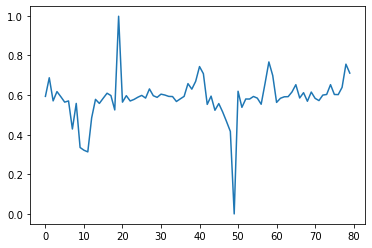

In [16]:
pos_test_data_path = 'save_data/pos_save_temp/test/test-1.csv'
df = pd.read_csv(pos_test_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
nor_df = axis_normalization(df)
plt.plot(nor_df[0][20:100])
# plt.plot(nor_df[1][0:480])


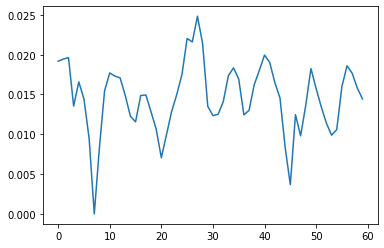

In [31]:
virtural_data_path = 'save_data/Vitural_NewData/scale_motion_0.8merge/acc/ankle_m_acc_merge_data.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
nor_df = axis_normalization(df)
plt.plot(nor_df[0][40:100])

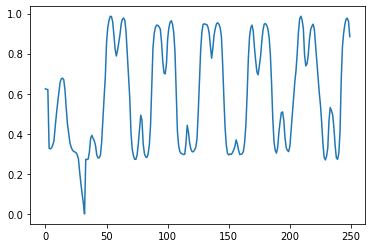

In [86]:
virtural_data_path = 'save_data/animation_Vitural_NewData/ankleTap/acc/ankleTap_m_acc_merge_data.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 30, mode='same')
nor_df = axis_normalization(df)
plt.plot(nor_df[0][:250])


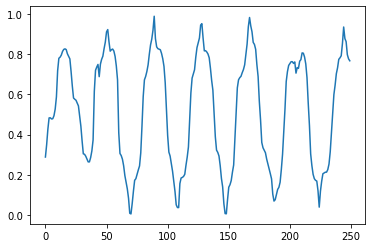

In [87]:
virtural_data_path = 'save_data/Virtual_Seg_byScale/1.1/ankle/ankle-1.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 50, mode='same')
nor_df = axis_normalization(df)
plt.plot(nor_df[0][:250])

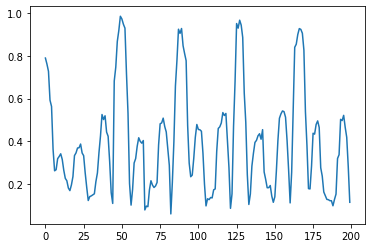

In [151]:
virtural_data_path = 'save_data/pos_save_temp/test_pos.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 50, mode='same')
fuse_df = three_fuse(df)
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')
nor_df = axis_normalization(fuse_df)
plt.plot(nor_df[0][:200])
# plt.plot(nor_df[1][50:250])

In [6]:
virtural_data_path = 'save_data/pos_save_temp/test_pos_ori.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 50, mode='same')
fuse_df = three_fuse(df)
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')
nor_df_08 = axis_normalization(fuse_df)
plt.plot(nor_df[0][100:200], color='y')
plt.plot(nor_df_08[0][100:200], color='c')

NameError: name 'nor_df' is not defined

对比不同幅度

In [ ]:
Pos_New_New_Virtual_Seg_byScale_spline5_120

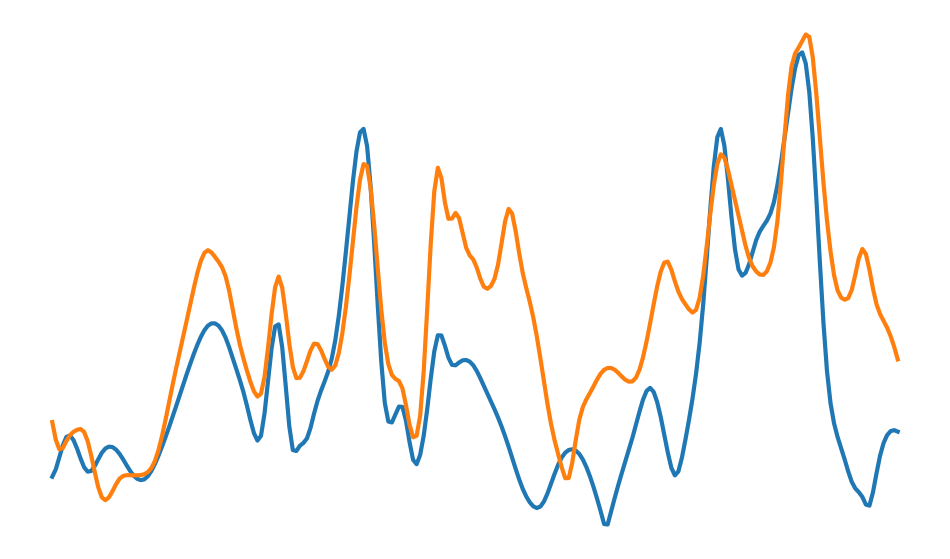

In [11]:
plt.figure(figsize=(12, 7))

# virtural_data_path05 = 'save_data/Ori_motion_pos_data_spline5_120/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/12-16-Realdataset-Xia/Dataset-ID-5/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/pos_New_New_VirtualData_addPelvis_xyz_25/spine_data_5/0.9merge/highknee/highknee.csv'
# virtural_data_path05 = 'save_data/RealData_Seg_byName/EFFY/warmup/warmup-1.csv'
# virtural_data_path05 = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline3_240/1.1/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline5_120/0.9/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/0.9/ankle/ankle-1.csv'

# virtural_data_path05 = 'save_data/Animation_record_pos_data_spline5_120/highKnee/highKnee-1.csv'
virtural_data_path05 = 'CorData-Seg/Virtual_New_Conv_0115_size3_spline5_240/2/reverselunge/reverselunge-2.csv'

# virtural_data_path13 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/0.9/reverseLunge/reverseLunge-1.csv'
# virtural_data_path13 = 'save_data/Ori_Motion_acc_data_spline3_240/ankle/ankle-1.csv'

# virtural_data_path13 = 'save_data/Virtual_New_Conv_0108_concave_spline5_240/1/HighKnee/HighKnee-2.csv'
virtural_data_path13 = 'CorData-Seg/Virtual_New_Conv_0115_size3_trans_spline5_240/2/reverselunge/reverselunge-2.csv'

# virtural_data_path13 = 'save_data/Ori_Motion/spline3/sideCrunch/sideCrunch.csv'
# virtural_data_path13 = 'save_data/Virtual_New_Conv/spline3/sidecrunch1.csv'

# virtural_data_path13 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/0.9/sidecrunch/sidecrunch-1.csv'
# virtural_data_path13 = 'save_data/Ori_motion_pos_data_spline5_120/highknee/highknee-1.csv'
# virtural_data_path13 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xyz_25_spline5_120/0.9/sidecrunch/sidecrunch-1.csv'

df_05 = pd.read_csv(virtural_data_path05, index_col=False, header=0, usecols=[9, 10, 11])
df_13 = pd.read_csv(virtural_data_path13, index_col=False, header=0, usecols=[9, 10, 11])

df_05 = np.array(df_05).T
df_13 = np.array(df_13).T

# for k in range(df_05.shape[0]):
#     df_05[k, :] = np_move_avg(df_05[k, :], 50, mode='same')
#
# for k in range(df_13.shape[0]):
#     df_13[k, :] = np_move_avg(df_13[k, :], 5, mode='same')

fuse_df_08 = three_fuse(df_05)
fuse_df_13 = three_fuse(df_13)

# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')

nor_df_08 = axis_normalization(fuse_df_08)
nor_df_13 = axis_normalization(fuse_df_13)
# nor_df_08 = axis_normalization(df_05)
# nor_df_13 = axis_normalization(df_13)


plt.plot(nor_df_08[0][:240],label = f'Original Signal',linewidth=3)
plt.plot(nor_df_13[0][:240],label = f'None Translation',linewidth=3)
plt.axis('off')
# plt.title("Comparison of Waveforms")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")
#
# plt.plot(nor_df_08[1][100:300],color='y')
# plt.plot(nor_df_13[1][100:300],color='c')
#
# plt.plot(nor_df_08[2][100:300],color='y')
# plt.plot(nor_df_13[2][100:300],color='c')
# plt.legend(loc='upper right')
plt.savefig("reverselunge_trans.png", dpi=300, transparent=True)
# plt.plot(df_05[0][0:400],color='y')
# plt.plot(df_13[0][0:400],color='c')

Text(0, 0.5, 'Amplitude')

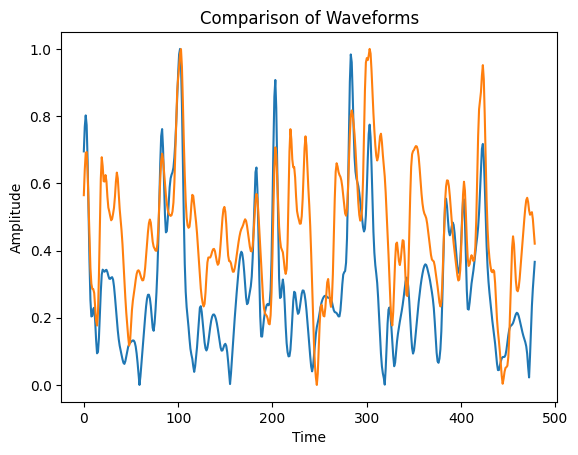

In [6]:
# plt.figure(figsize=(12, 7))

# virtural_data_path05 = 'save_data/Ori_motion_pos_data_spline5_120/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/12-16-Realdataset-Xia/Dataset-ID-5/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/pos_New_New_VirtualData_addPelvis_xyz_25/spine_data_5/0.9merge/highknee/highknee.csv'
# virtural_data_path05 = 'save_data/RealData_Seg_byName/EFFY/warmup/warmup-1.csv'
# virtural_data_path05 = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline3_240/1.1/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline5_120/0.9/ankle/ankle-1.csv'
# virtural_data_path05 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/0.9/ankle/ankle-1.csv'
virtural_data_path05 = 'save_data/Animation_record_pos_data_spline5_120/highKnee/highKnee-1.csv'
virtural_data_path05 = 'CorData-Seg/Virtual_New_Conv_0115_size3_spline4_240/0/reverselunge/reverselunge-2.csv'
# virtural_data_path05 = 'save_data/Virtual_New_Conv_0108_concave_spline4_240/0/HighKnee/HighKnee-1.csv'
# virtural_data_path13 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/0.9/reverseLunge/reverseLunge-1.csv'
# virtural_data_path13 = 'save_data/Ori_Motion_acc_data_spline3_240/ankle/ankle-1.csv'
virtural_data_path13 = 'save_data/Virtual_New_Conv_0108_concave_spline5_240/1/HighKnee/HighKnee-2.csv'
virtural_data_path13 = 'save_data/Virtual_New_Conv_0108_convex_spline4_240/0/HighKnee/HighKnee-1.csv'
virtural_data_path13 = 'CorData-Seg/Virtual_New_Conv_0115_size3_trans_spline4_240/0/reverselunge/reverselunge-2.csv'
# virtural_data_path13 = 'save_data/Ori_Motion/spline3/sideCrunch/sideCrunch.csv'
# virtural_data_path13 = 'save_data/Virtual_New_Conv/spline3/sidecrunch1.csv'

# virtural_data_path13 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/0.9/sidecrunch/sidecrunch-1.csv'
# virtural_data_path13 = 'save_data/Ori_motion_pos_data_spline5_120/highknee/highknee-1.csv'
# virtural_data_path13 = 'save_data/Pos_New_New_Virtual_Seg_byScale_xyz_25_spline5_120/0.9/sidecrunch/sidecrunch-1.csv'

df_05 = pd.read_csv(virtural_data_path05, index_col=False, header=0, usecols=[9, 10, 11])
df_13 = pd.read_csv(virtural_data_path13, index_col=False, header=0, usecols=[9, 10, 11])

df_05 = np.array(df_05).T
df_13 = np.array(df_13).T

# for k in range(df_05.shape[0]):
#     df_05[k, :] = np_move_avg(df_05[k, :], 50, mode='same')
#
# for k in range(df_13.shape[0]):
#     df_13[k, :] = np_move_avg(df_13[k, :], 5, mode='same')

fuse_df_08 = three_fuse(df_05)
fuse_df_13 = three_fuse(df_13)

# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')

nor_df_08 = axis_normalization(fuse_df_08)
nor_df_13 = axis_normalization(fuse_df_13)
# nor_df_08 = axis_normalization(df_05)
# nor_df_13 = axis_normalization(df_13)


plt.plot(nor_df_08[0][:480])
plt.plot(nor_df_13[0][:480])
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")
#
# plt.plot(nor_df_08[1][100:300],color='y')
# plt.plot(nor_df_13[1][100:300],color='c')
#
# plt.plot(nor_df_08[2][100:300],color='y')
# plt.plot(nor_df_13[2][100:300],color='c')
# plt.legend(loc='upper right')

# plt.plot(df_05[0][0:400],color='y')
# plt.plot(df_13[0][0:400],color='c')

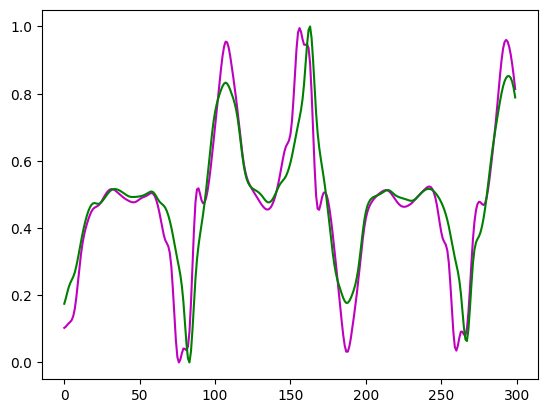

In [4]:
virtural_data_path08 = 'save_data/Pos_New_New_Virtual_Seg_byScale/1.3/ankle/ankle-1.csv'
virtural_data_path08 = 'save_data/Virtual_New_Conv_0108_concave_spline4_240/0/HighKnee/HighKnee-1.csv'
# virtural_data_path_13 = 'save_data/Pos_Virtual_Seg_byScale/1.3/ankle/ankle-1.csv'
virtural_data_path_13 = 'save_data/pos_New_New_VirtualData/spine_data/0.5merge/ankle/ankle.csv'
virtural_data_path_13 = 'save_data/Virtual_New_Conv_0108_inc_spline4_240/0/HighKnee/HighKnee-1.csv'

df_08 = pd.read_csv(virtural_data_path08, index_col=False, header=0, usecols=[12, 13, 14])
df_13 = pd.read_csv(virtural_data_path_13, index_col=False, header=0, usecols=[12, 13, 14])

df_08 = np.array(df_08).T
df_13 = np.array(df_13).T

# for k in range(df.shape[0]):
#     df_08[k, :] = np_move_avg(df_08[k, :], 50, mode='same')

# for k in range(df.shape[0]):
#     df_13[k, :] = np_move_avg(df_13[k, :], 50, mode='same')
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
nor_df_08 = axis_normalization(df_08)
nor_df_13 = axis_normalization(df_13)

plt.plot(nor_df_08[0][100:400], color='m')
plt.plot(nor_df_13[0][100:400], color='g')

# plt.plot(nor_df_08[0][100:300])

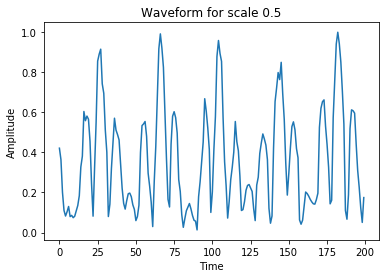

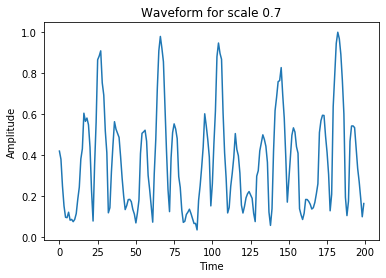

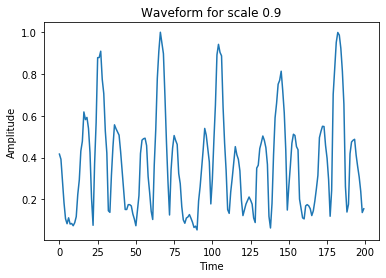

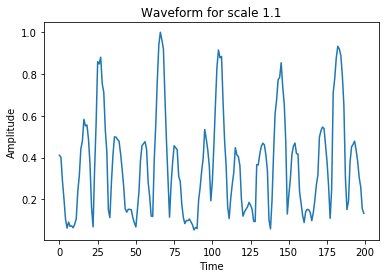

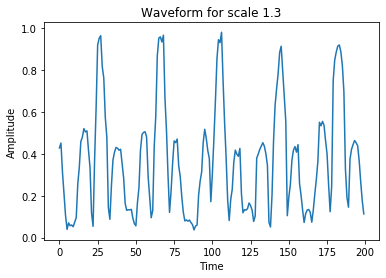

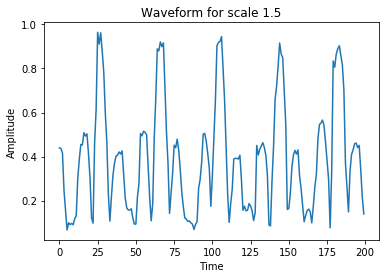

In [26]:
scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
for i in scale_list:
    virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale/' + i + '/ankle/ankle-1.csv'
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = np.array(df).T
    for k in range(df.shape[0]):
        df[k, :] = np_move_avg(df[k, :], 50, mode='same')
    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)
    plt.plot(r_nor_df[0][100:300])

    # 添加标题和标签
    plt.title(f"Waveform for scale {i}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    # 显示每个波形
    plt.show()

In [22]:
scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
# scale_list = ["0.5", "0.7", "0.8","0.9", "1.1", "1.2","1.3", "1.5"]
# scale_list = ["0.8","0.9", "1.1", "1.2","1.3"]
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

for i in scale_list:
    virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale/' + i + '/ankle/ankle-1.csv'
    # virtual_data_path = 'save_data/Pos_Virtual_Seg_byScale/' + i + '/ankle/ankle-1.csv'
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = np.array(df).T
    for k in range(df.shape[0]):
        df[k, :] = np_move_avg(df[k, :], 50, mode='same')
    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)

    # 绘制每个波形在同一个坐标系中
    plt.plot(r_nor_df[0][100:150], label=f"Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend()

# 显示所有波形在同一个图中
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 864x504 with 0 Axes>

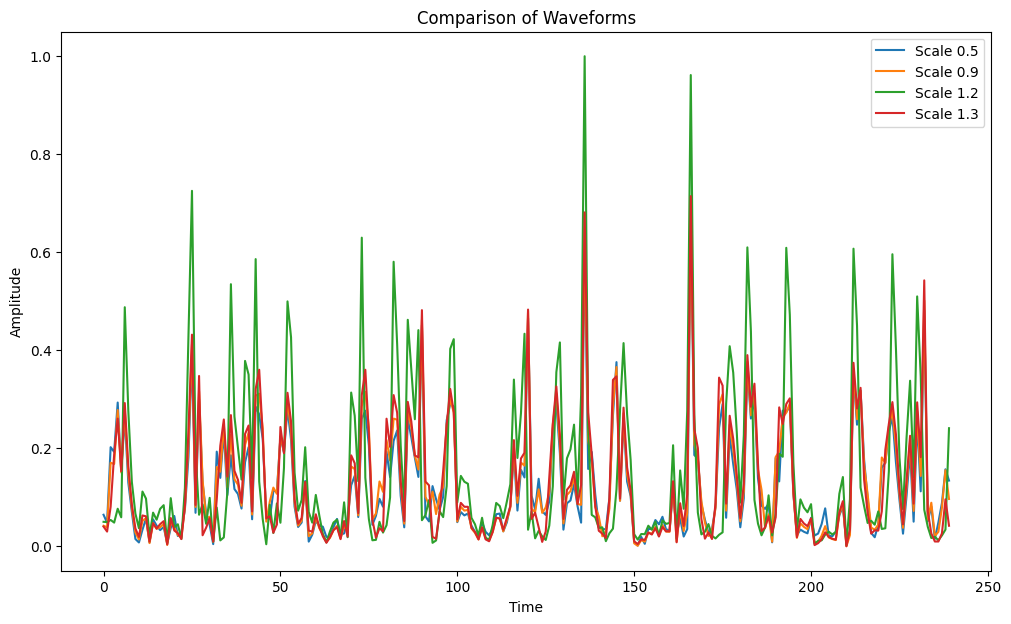

In [6]:
scale_list = ["0.5", "0.9", "1.2", "1.3"]
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

for i in scale_list:
    virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale/' + i + '/highknee/highknee-1.csv'
    # virtual_data_path = 'save_data/Pos_Virtual_Seg_byScale/' + i + '/ankle/ankle-1.csv'
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    df = np.array(df).T
    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)

    # 绘制每个波形在同一个坐标系中
    plt.plot(r_nor_df[0][:240], label=f"Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend()

# 显示所有波形在同一个图中
plt.show()

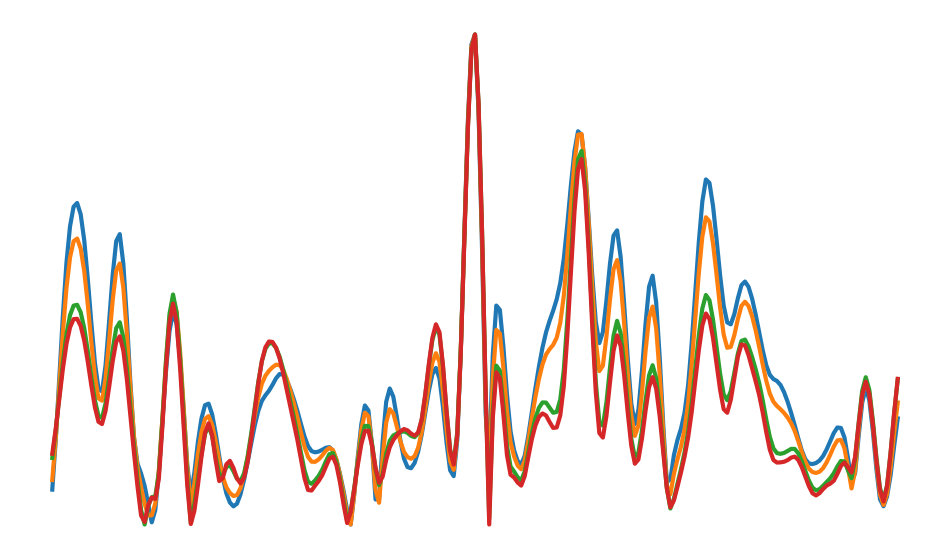

In [3]:
scale_list = ["0.8", "0.9", "1.1", "1.2", "1.3"]
scale_list = ["0.5", "0.9", "1.1", "1.3", "1.5"]
scale_list = ["0.5", "0.7", "1.3", "1.5"]
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

for i in scale_list:
    virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline5_120/' + i + '/sidetoside/sidetoside-1.csv'
    virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline5_120/' + i + '/sidetoside/sidetoside-1.csv'
    # virtual_data_path = 'save_data/Pos_Virtual_Seg_byScale/' + i + '/ankle/ankle-1.csv'
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = np.array(df).T
    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)

    # 绘制每个波形在同一个坐标系中
    plt.plot(r_nor_df[0][0:240], label=f"Scale {i}",linewidth=3)

# 添加标题和标签
# plt.title("Comparison of Waveforms")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")
plt.axis('off')
# 添加图例
# plt.legend(loc='upper right')

# 显示所有波形在同一个图中
plt.savefig("sidetoside_factor.png", dpi=300,transparent=True)
plt.show()


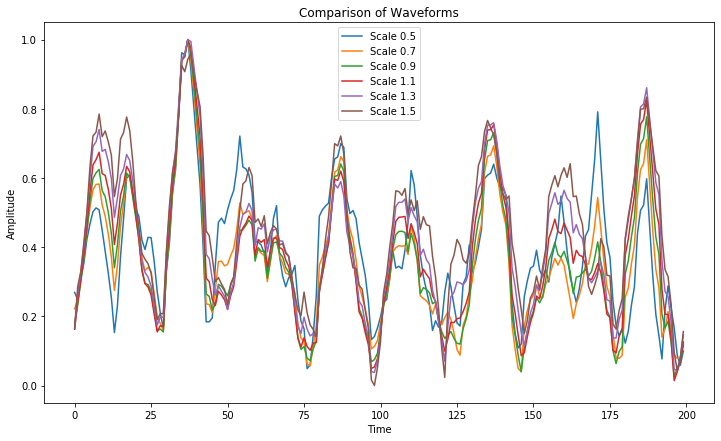

In [12]:
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

real_data_path = 'save_data/RealData_Seg_byName/Leafy/reverseLunge/reverseLunge-1.csv'
# df = pd.read_csv(real_data_path, index_col=False, header=0, usecols= [12,13,14])
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
df = np.array(df).T
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
fuse_df = three_fuse(df)
human_nor_df = axis_normalization(fuse_df)
# plt.plot(human_nor_df[0][100:200], label=f"real")


scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]

for i in scale_list:
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/reverseLunge/reverseLunge-1.csv'
    virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy/' + i + '/reverseLunge/reverseLunge-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    df = np.array(df).T
    for k in range(df.shape[0]):
        df[k, :] = np_move_avg(df[k, :], 30, mode='same')
    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)

    # 绘制每个波形在同一个坐标系中
    plt.plot(r_nor_df[0][100:300], label=f"Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend()

# 显示所有波形在同一个图中
plt.show()

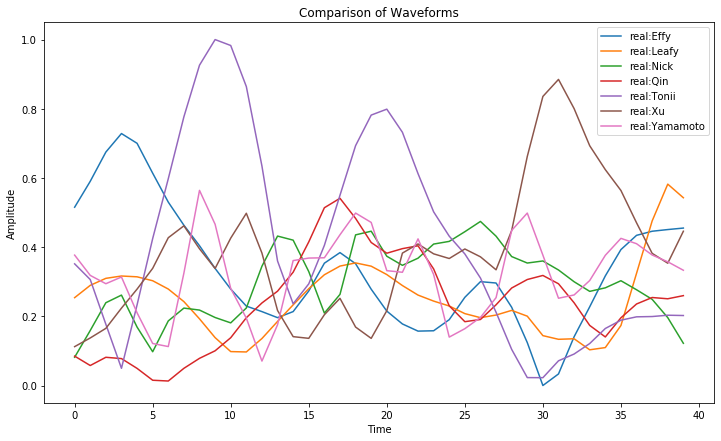

In [26]:
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

human_name = ["Effy", "Leafy", "Nick", "Qin", "Tonii", "Xu", "Yamamoto"]

highKnee = 'reverselunge'
for name in human_name:
    # real_data_path = 'save_data/RealData_Seg_byName/Leafy/highKnee/highKnee-1.csv'
    real_data_path = 'save_data/RealData_Seg_byName/' + name + '/' + motion + '/' + motion + '-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(real_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    fuse_df = three_fuse(df)
    human_nor_df = axis_normalization(fuse_df)
    # human_nor_df = axis_normalization(df)

    plt.plot(human_nor_df[0][200:240], label=f"real:{name}")
    # plt.plot(human_nor_df[0][200:300], label=f"real")

    scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]

# for i in scale_list:
#     virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/highKnee/highKnee-1.csv'
#     # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale/' + i + '/reverseLunge/reverseLunge-1.csv'
#     # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
#     df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9,10,11])
#     # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
#     df = np.array(df).T
#
#     for k in range(df.shape[0]):
#         df[k, :] = np_move_avg(df[k, :], 20, mode='same')
#
#     fuse_df = three_fuse(df)
#     r_nor_df = axis_normalization(fuse_df)
#     # r_nor_df = axis_normalization(df)
#
#     # 绘制每个波形在同一个坐标系中
#     plt.plot(r_nor_df[0][100:500], label=f"Scale {i}")
# plt.plot(r_nor_df[0][200:300], label=f"Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend()

# 显示所有波形在同一个图中
plt.show()

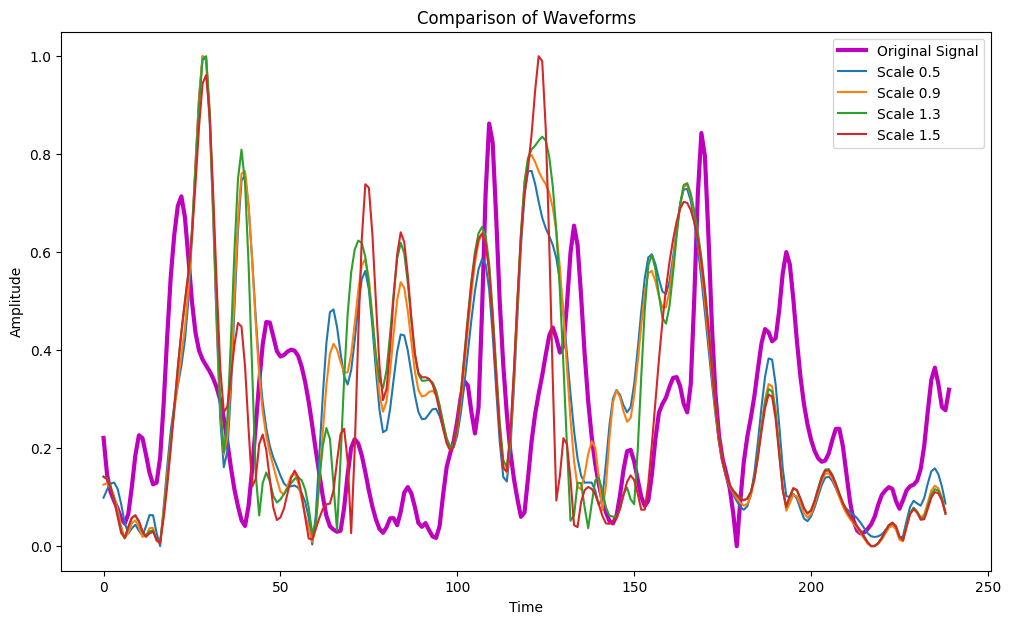

In [61]:
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

human_name = ["Effy", "Leafy", "Nick", "Qin", "Tonii", "Xu", "Yamamoto"]

motion = 'highknee'

# real_data_path = 'save_data/RealData_Seg_byName/Tonii/' +  motion +'/' +  motion + '-1.csv'
real_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_18_spline5_120/' + '1.1' + '/' + motion + '/' + motion + '-1.csv'
real_data_path = 'save_data/Ori_Motion/spline3/highknee/highknee.csv'
# real_data_path = 'save_data/Ori_motion_pos_data/ankle/' + '0.9' + '/' +  motion +'/' +  motion + '-2.csv'
# real_data_path = 'save_data/Animation_record_pos_data_spline5_120/' +  motion +'/' +  motion + '-1.csv'
# real_data_path = 'save_data/Ori_motion_pos_data_spline5_120/ankle/ankle-1.csv'

# df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
# df = pd.read_csv(real_data_path, index_col=False, header=0, usecols= [9])
df = np.array(df).T

# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

fuse_df = three_fuse(df)
human_nor_df = axis_normalization(fuse_df)
# human_nor_df = axis_normalization(df)

# plt.plot(human_nor_df[1][100:400], label=f"real")
# plt.plot(human_nor_df[0][200:300], label=f"real")
plt.plot(human_nor_df[0][:240], color = 'm', label=f"Original Signal", linewidth=3)

scale_list = ["0.5", "0.9" ,"1.3", "1.5"]

for i in scale_list:
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline5_120/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xyz_25_spline5_120/' + i + '/' + motion + '/' + motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xyz_25_spline5_120/' + i + '/warm/warm-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)
    # r_nor_df = axis_normalization(df)

    # 绘制每个波形在同一个坐标系中
    # plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
    plt.plot(r_nor_df[0][0:240], label=f"Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend(loc='upper right')

# 显示所有波形在同一个图中
plt.show()

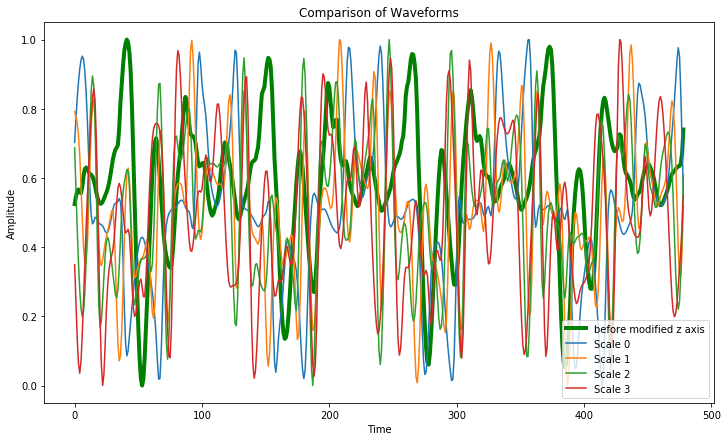

In [4]:
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

human_name = ["Effy", "Leafy", "Nick", "Qin", "Tonii", "Xu", "Yamamoto"]

motion = 'ankle'

real_data_path = 'save_data/RealData_Seg_byName/Effy/' + motion + '/' + motion + '-3.csv'
# real_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_18_spline5_120/' + '0.9' + '/' +  motion +'/' +  motion + '-2.csv'
# real_data_path = 'save_data/Ori_motion_pos_data/ankle/' + '0.9' + '/' +  motion +'/' +  motion + '-2.csv'
# real_data_path = 'save_data/Ori_motion_pos_data_spline5_120/' +  motion +'/' +  motion + '-2.csv'
# real_data_path = 'save_data/Ori_motion_pos_data/ankle/ankle.csv'

# df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
# df = pd.read_csv(real_data_path, index_col=False, header=0, usecols= [9])
df = np.array(df).T

# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

# fuse_df = three_fuse(df)
# human_nor_df = axis_normalization(fuse_df)
human_nor_df = axis_normalization(df)

# plt.plot(human_nor_df[1][100:400], label=f"real")
# plt.plot(human_nor_df[0][200:300], label=f"real")
plt.plot(human_nor_df[0][:480], '-', label=f"before modified z axis", linewidth=4, color='g')

# scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
scale_list = ["0", "1", "2", "3"]

for i in scale_list:
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_18_spline5_120/' + i + '/' +  motion +'/' +  motion + '-2.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xyz_25_spline5_120/' + i + '/' +  motion +'/' +  motion + '-2.csv'
    # virtual_data_path = 'save_data/Virtual_New_Conv_x_spline4_240/' + i + '/' + motion + '/' + motion + '-1.csv'
    virtual_data_path = 'save_data/Virtual_New_Conv_notrans_spline3_240/' + i + '/' + motion + '/' + motion + '-1.csv'
    # virtual_data_path = 'save_data/Virtual_New_New_spline4_240/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/warm/warm-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    # fuse_df = three_fuse(df)
    # r_nor_df = axis_normalization(fuse_df)
    r_nor_df = axis_normalization(df)

    # 绘制每个波形在同一个坐标系中
    # plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
    plt.plot(r_nor_df[0][0:480], label=f"Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend()

# 显示所有波形在同一个图中
plt.show()

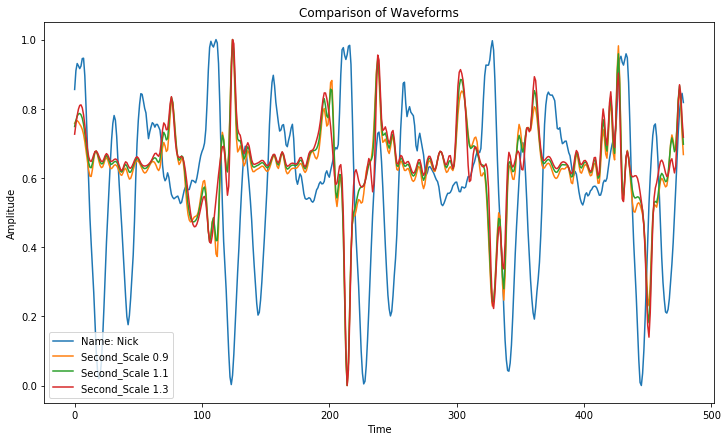

In [59]:
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

# human_name = ["Effy", "Leafy", "Nick", "Qin", "Tonii", "Xu", "Yamamoto"]
human_name = ["Nick"]

motion = 'ankle'
# scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
scale_list = ["0.9", "1.1", "1.3"]

for name in human_name:
    real_data_path = 'save_data/RealData_Seg_byName/' + name + '/' + motion + '/' + motion + '-2.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline5_120/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/warm/warm-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 30, mode='same')

# fuse_df = three_fuse(df)
# r_nor_df = axis_normalization(fuse_df)
r_nor_df = axis_normalization(df)

# 绘制每个波形在同一个坐标系中
# plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
plt.plot(r_nor_df[0][0:480], label=f"Name: {name}")

for i in scale_list:
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_18_spline5_120/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    virtual_data_path = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline3_240/' + i + '/' + motion + '/' + motion + '-2.csv'

    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/warm/warm-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    # fuse_df = three_fuse(df)
    # r_nor_df = axis_normalization(fuse_df)
    r_nor_df = axis_normalization(df)

    # 绘制每个波形在同一个坐标系中
    # plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
    plt.plot(r_nor_df[0][0:480], label=f"Second_Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend()

# 显示所有波形在同一个图中
plt.show()

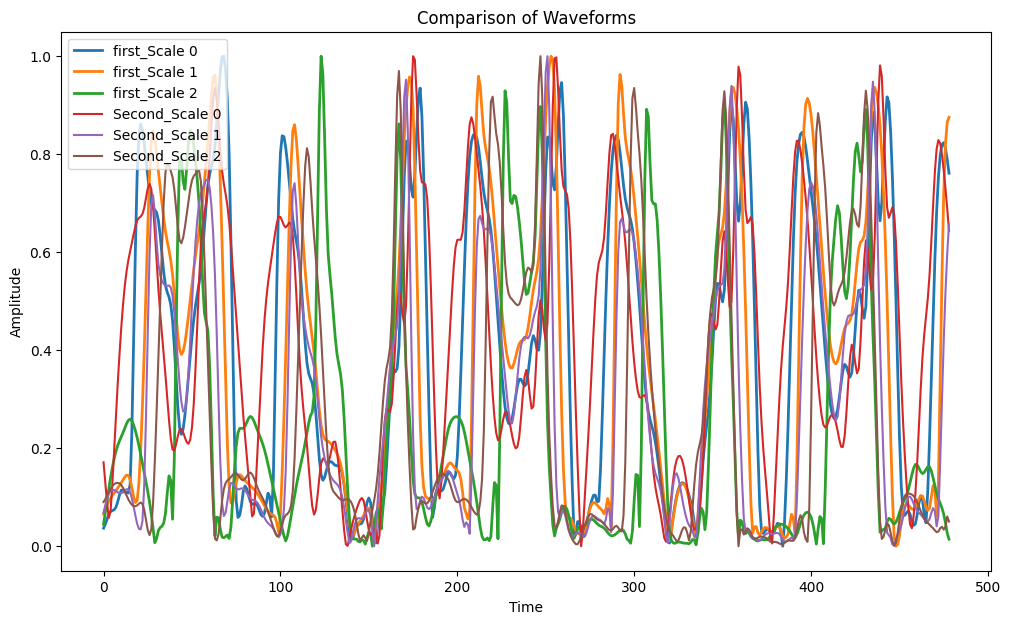

In [12]:

plt.figure(figsize=(12, 7))

human_name = ["Effy", "Leafy", "Nick", "Qin", "Tonii", "Xu", "Yamamoto"]

motion = 'highknee'

# scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
scale_list = ["0","3"]
scale_list = ["0", "1", "2"]
for i in scale_list:
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xyz_25_spline5_120/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/warm/warm-1.csv'
    virtual_data_path = 'save_data/Virtual_New_Conv_x_spline4_240/' + i + '/' + motion + '/' + motion + '-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)
    # r_nor_df = axis_normalization(df)

    # 绘制每个波形在同一个坐标系中
    # plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
    plt.plot(r_nor_df[0][0:480], '-', label=f"first_Scale {i}", linewidth=2)

# real_data_path = 'save_data/RealData_Seg_byName/Tonii/' +  motion +'/' +  motion + '-1.csv'
real_data_path = 'save_data/Ori_Motion/spline3/' + motion + '/' + motion + '.csv'
# real_data_path = 'save_data/Ori_Motion/spline3/'+  motion + '/' + motion  + '.csv'
# real_data_path = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline3_240/0.5/'+  motion + '/' + motion  + '-1.csv'
# real_data_path = 'save_data/Ori_motion_pos_data/ankle/' + '0.9' + '/' +  motion +'/' +  motion + '-2.csv'
# real_data_path = 'save_data/Animation_record_pos_data_spline5_120/' +  motion +'/' +  motion + '-1.csv'
# real_data_path = 'save_data/Ori_motion_pos_data_spline5_120/ankle/ankle-1.csv'

# df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
# df = pd.read_csv(real_data_path, index_col=False, header=0, usecols= [9])
df = np.array(df).T

# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

fuse_df = three_fuse(df)
human_nor_df = axis_normalization(fuse_df)
# human_nor_df = axis_normalization(df)

# plt.plot(human_nor_df[1][100:400], label=f"real")
# plt.plot(human_nor_df[0][200:300], label=f"real")
# plt.plot(human_nor_df[2][:240], '-', label=f"original signal", linewidth = 5,color = 'm')
# scale_list = ["0", "1", "2", "3", "4"]
scale_list = ["0", "1", "2"]
for i in scale_list:
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline5_120/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    virtual_data_path = 'save_data/Virtual_New_Conv_0108_concave_spline4_240/' + i + '/' + motion + '/' + motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/warm/warm-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)
    # r_nor_df = axis_normalization(df)

    # 绘制每个波形在同一个坐标系中
    # plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
    plt.plot(r_nor_df[0][0:480], label=f"Second_Scale {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend()

# 显示所有波形在同一个图中
plt.show()

save_data/Virtual_New_Conv/spline3/highknee\highKnee0.csv
save_data/Virtual_New_Conv/spline3/highknee\highKnee1.csv
save_data/Virtual_New_Conv/spline3/highknee\highKnee2.csv


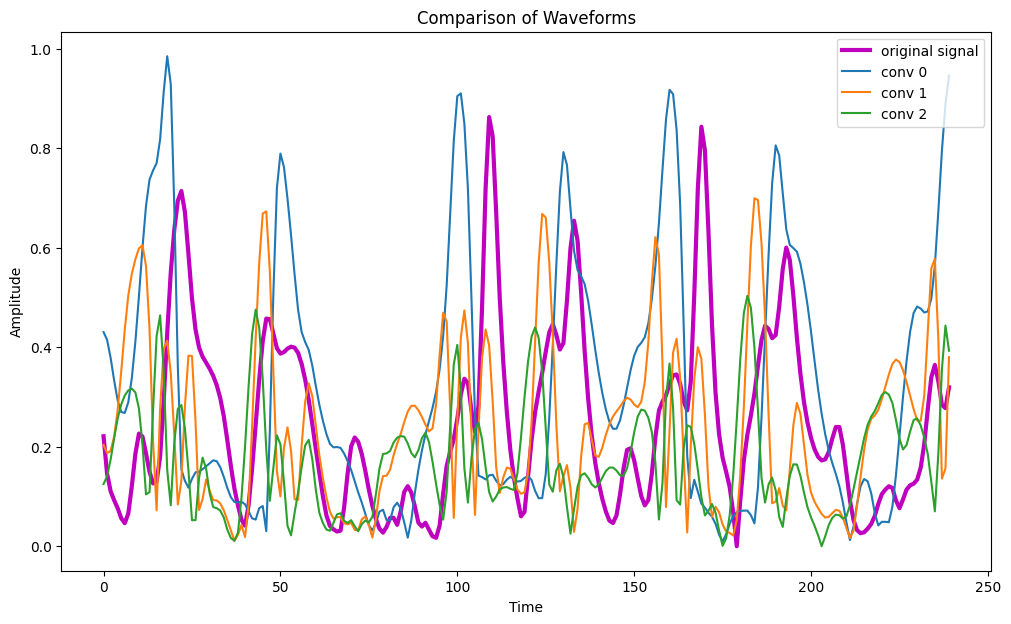

In [56]:
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

human_name = ["Effy", "Leafy", "Nick", "Qin", "Tonii", "Xu", "Yamamoto"]

motion = 'highknee'

# real_data_path = 'save_data/RealData_Seg_byName/Tonii/' +  motion +'/' +  motion + '-1.csv'
real_data_path = 'save_data/Ori_Motion/spline3/highknee/highknee.csv'
# real_data_path = 'save_data/RealData_Seg_byName/Nick/ankle/ankle-2.csv'
# real_data_path = 'save_data/Ori_Motion/spline3/'+  motion + '/' + motion  + '.csv'
# real_data_path = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline3_240/0.5/'+  motion + '/' + motion  + '-1.csv'
# real_data_path = 'save_data/Ori_motion_pos_data/ankle/' + '0.9' + '/' +  motion +'/' +  motion + '-2.csv'
# real_data_path = 'save_data/Animation_record_pos_data_spline5_120/' +  motion +'/' +  motion + '-1.csv'
# real_data_path = 'save_data/Ori_motion_pos_data_spline5_120/ankle/ankle-1.csv'

# df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
# df = pd.read_csv(real_data_path, index_col=False, header=0, usecols= [9])
df = np.array(df).T

# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

fuse_df = three_fuse(df)
human_nor_df = axis_normalization(fuse_df)
# human_nor_df = axis_normalization(df)

# plt.plot(human_nor_df[1][100:400], label=f"real")
# plt.plot(human_nor_df[0][200:300], label=f"real")
# plt.plot(human_nor_df[0][:240], '-', label=f"original signal", linewidth=3, color='m')

# scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
target_path = 'save_data/Virtual_New_Conv/spline3/' + motion + '/'
# target_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
virtual_spline_data_path = glob.glob(target_path + '*' + motion + '*' + '.csv')

for i, file in enumerate(virtual_spline_data_path):
    print(file)
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline5_120/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    virtual_data_path = file
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xyz_25_spline5_120/' + i + '/warm/warm-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)
    # r_nor_df = axis_normalization(df)

    # 绘制每个波形在同一个坐标系中
    # plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
    plt.plot(r_nor_df[0][0:240], label=f"conv {i}")

# 添加标题和标签
plt.title("Comparison of Waveforms")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 添加图例
plt.legend(loc='upper right')

# 显示所有波形在同一个图中
plt.show()

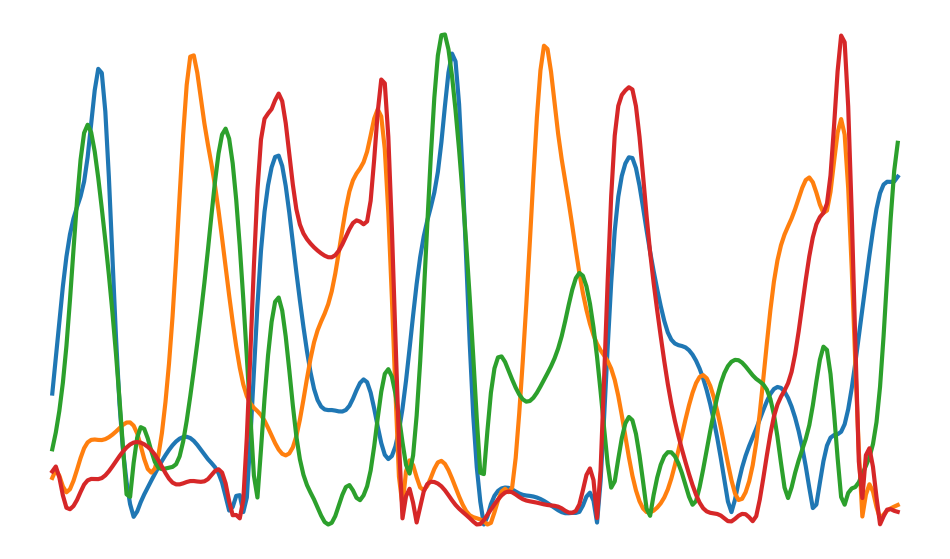

In [22]:
# 创建一个图形窗口
plt.figure(figsize=(12, 7))

human_name = ["Effy", "Leafy", "Nick", "Qin", "Tonii", "Xu", "Yamamoto"]

motion = 'highknee'
# scale_list = ["0.5", "0.7", "0.9", "1.1", "1.3", "1.5"]
scale_list = ["0", "1", "2","3"]

# real_data_path = 'save_data/RealData_Seg_byName/Tonii/' +  motion +'/' +  motion + '-1.csv'
# real_data_path = 'save_data/Ori_Motion/spline3/sideCrunch/sideCrunch.csv'
# real_data_path = 'save_data/Ori_Motion/spline3/'+  motion + '/' + motion  + '.csv'
real_data_path = 'save_data/Ori_Motion_acc_data_spline3_240/' + motion + '/' + motion + '-2.csv'
# real_data_path = 'save_data/Ori_motion_pos_data/ankle/' + '0.9' + '/' +  motion +'/' +  motion + '-2.csv'
# real_data_path = 'save_data/Animation_record_pos_data_spline5_120/' +  motion +'/' +  motion + '-1.csv'
# real_data_path = 'save_data/Ori_motion_pos_data_spline5_120/ankle/ankle-1.csv'

# df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
# df = pd.read_csv(real_data_path, index_col=False, header=0, usecols= [9])
df = np.array(df).T

# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

fuse_df = three_fuse(df)
human_nor_df = axis_normalization(fuse_df)
# human_nor_df = axis_normalization(df)

# plt.plot(human_nor_df[1][100:400], label=f"real")
# plt.plot(human_nor_df[0][200:300], label=f"real")
# plt.plot(human_nor_df[0][:240], '-', label=f"original signal", linewidth=5, color='m')

for i in scale_list:
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_VirtualData_addPelvis_xyz_25_spline5_120/' + i + '/' +  motion +'/' +  motion + '-1.csv'
    virtual_data_path = 'save_data/Virtual_New_Conv_0108_size7_spline5_240/' + i + '/' + motion + '/' + motion + '-2.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_xy_spline5_120/' + i + '/warm/warm-1.csv'
    # virtual_data_path = 'save_data/Pos_New_New_Virtual_Seg_byScale_spline/' + i + '/warm/warm-1.csv'
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[12, 13, 14])
    df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols=[9, 10, 11])
    # df = pd.read_csv(virtual_data_path, index_col=False, header=0, usecols= [9])
    df = np.array(df).T

    # for k in range(df.shape[0]):
    #     df[k, :] = np_move_avg(df[k, :], 30, mode='same')

    fuse_df = three_fuse(df)
    r_nor_df = axis_normalization(fuse_df)
    # r_nor_df = axis_normalization(df)

    # 绘制每个波形在同一个坐标系中
    # plt.plot(r_nor_df[1][100:150], label=f"Scale {i}")
    plt.plot(r_nor_df[0][0:240], label=f"Conv {i}",linewidth=3)
    
plt.axis('off')
# 添加标题和标签
# plt.title("Comparison of Waveforms")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")

# 添加图例
# plt.legend(loc='upper right')

plt.savefig("highknee_conv.png", dpi=300, transparent=True)
# 显示所有波形在同一个图中
plt.show()

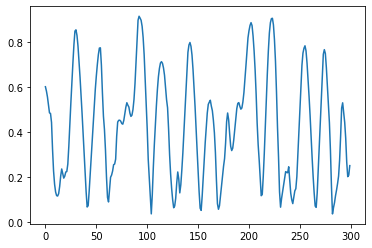

In [3]:
real_data_path = 'save_data/RealData_Seg_byName/Leafy/reverseLunge/reverseLunge-1.csv'
df = pd.read_csv(real_data_path, index_col=False, header=0, usecols=[9, 10, 11])
df = np.array(df).T
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
fuse_df = three_fuse(df)
human_nor_df = axis_normalization(fuse_df)
plt.plot(human_nor_df[0][100:400])
# plt.plot(r_nor_df[1])
# plt.plot(nor_df[0][:480])
#
# plt.plot(nor_df[0][:480])

(3, 302)
(3, 296)
(3, 314)
(3, 302)
(3, 305)


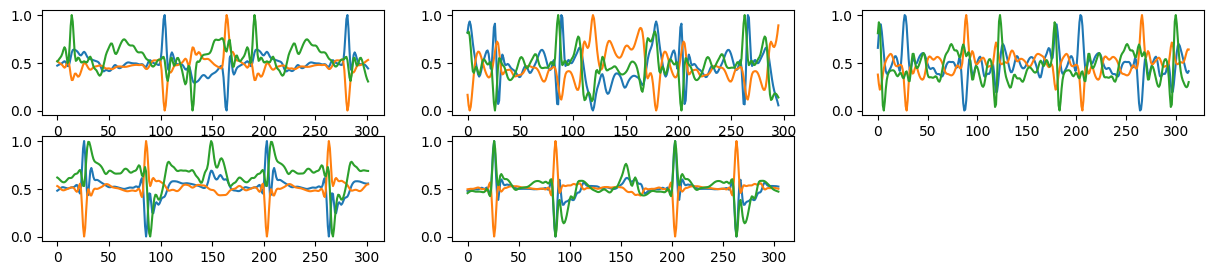

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def axis_normalization(datalist, stage=1):
    normalized_data = []
    #datalist = np.array(datalist)
    for data in datalist:
        maximum = max(data)
        minimum = min(data)
        # print("maximum is:",maximum,"minimum is:",minimum)
        normalized_data.append([(item - minimum) / (maximum - minimum) * stage for item in data])
    return np.array(normalized_data)

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(2, 3, i+1)
    real_data_path = 'datasets/Merge_fold_0713/ByNum_spline3/'+ str(i) + '/a8t/SIT356_' + str(i)+ '.csv'
    df = pd.read_csv(real_data_path, index_col=0, header=0, usecols= [0,1,2,3])
    df = np.array(df).T
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 50, mode='same')
# fuse_df = three_fuse(df)
# r_nor_df = axis_normalization(fuse_df)
    r_nor_df = axis_normalization(df)
    print(r_nor_df.shape)
    plt.plot(r_nor_df[0])
    plt.plot(r_nor_df[1])
    plt.plot(r_nor_df[2])
# plt.plot(r_nor_df[1])
# plt.plot(nor_df[0][:200])
# plt.plot(nor_df_08[0][:200])

In [71]:
write_path = "save_data/pos_save_temp/Leafy_nor.csv"
with open(write_path, mode="w", encoding="utf-8", newline='') as f:
    csv_writer = csv.writer(f)
    for col in range(r_nor_df.shape[1]):
        write_data = r_nor_df[:, col]
        csv_writer.writerow(write_data)

## ReverseLunge

In [118]:
temp_data = []
test_data_path = 'save_data/Vitural_NewData/scale_motion_1.1merge/pos/ReverseLunge_m_pos_merge_data.csv'
# test_data_path = 'save_data/Vitural_NewData/scale_motion_1.1merge/pos/ankle_m_pos_merge_data.csv'
modify_first_column(test_data_path)
df = pd.read_csv(test_data_path, header=None, index_col=False)
df = np.array(df).T
time_list = df[0, :]
for index in range(df.shape[0] - 2):
    # for index in range(data.shape[0]):
    # x = data[:,index+2]
    x = df[index + 2, :]
    # print(x)
    # print(x)
    second_pos = spline.spline_cal(time_list, x.tolist(), 1)
    re_x = second_pos.second_derivate()

    temp_data.append(re_x[10:len(re_x) - 10])  # 去掉头尾
temp_data = np.array(temp_data)
write_path = "save_data/pos_save_temp/ReverseLunge_pos_1.1.csv"
with open(write_path, mode="w", encoding="utf-8", newline='') as f:
    csv_writer = csv.writer(f)
    for col in range(temp_data.shape[1]):
        write_data = temp_data[:, col]
        csv_writer.writerow(write_data)




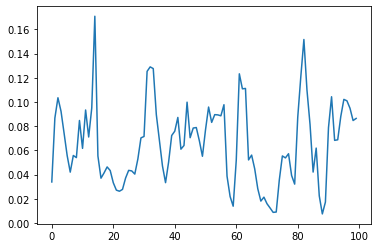

In [159]:
virtural_data_path = 'save_data/pos_save_temp/ReverseLunge_pos_0.8.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 50, mode='same')
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')
fuse_df = three_fuse(df)
# r_nor_df = axis_normalization(fuse_df)
nor_df_0_8 = axis_normalization(fuse_df)
plt.plot(nor_df_0_8[0][100:200])
# plt.plot(nor_df[1][50:250])

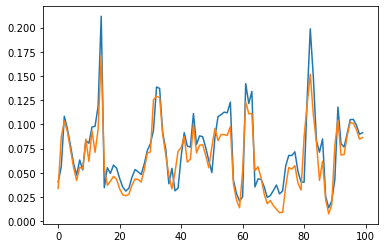

In [162]:
virtural_data_path = 'save_data/pos_save_temp/ReverseLunge_pos_1.1.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 50, mode='same')
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')
fuse_df = three_fuse(df)
nor_df = axis_normalization(fuse_df)
plt.plot(nor_df[0][100:200])
plt.plot(nor_df_0_8[0][100:200])
# plt.plot(nor_df[1][50:250])

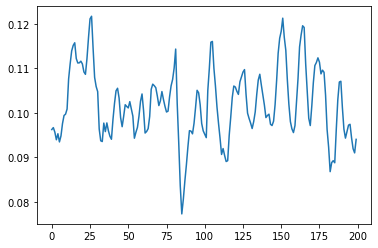

In [146]:
virtural_data_path = 'save_data/Vitural_NewData/scale_motion_1.1merge/acc/ReverseLunge_m_acc_merge_data.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 50, mode='same')
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')
nor_df_acc = axis_normalization(df)
plt.plot(nor_df_acc[0][100:300])
# plt.plot(nor_df_0_8[0][100:200])


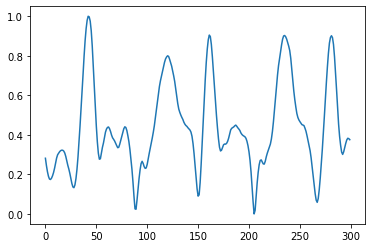

In [166]:
virtural_data_path = 'save_data/RealData_Seg_byName/Nick/ReverseLunge/ReverseLunge-1.csv'
df = pd.read_csv(virtural_data_path, index_col=False, header=0, usecols=[12, 13, 14])
df = np.array(df).T
for k in range(df.shape[0]):
    df[k, :] = np_move_avg(df[k, :], 50, mode='same')
# for k in range(df.shape[0]):
#     df[k, :] = np_move_avg(df[k, :], 10, mode='same')
fuse_df = three_fuse(df)
nor_df_effy = axis_normalization(fuse_df)
plt.plot(nor_df_effy[0][:300])
# plt.plot(nor_df[0][100:200])
# plt.plot(nor_df_0_8[0][100:200])
# plt.plot(nor_df_0_8[0][100:200])

D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[0 1 2]


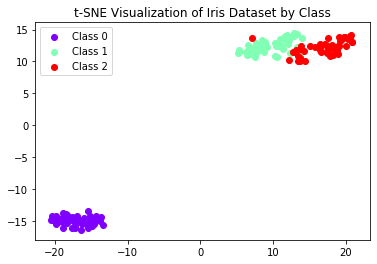

In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 初始化t-SNE模型
tsne = TSNE(n_components=2, random_state=42)  # 降维到2维

# 使用t-SNE进行降维
X_embedded = tsne.fit_transform(X)

# 可视化数据：按类别着色并绘制散点图
# 假设类别信息存储在变量y中
unique_labels = np.unique(y)  # 获取所有不同的类别标签
print(unique_labels)
# 为每个类别创建不同的颜色
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# 遍历每个类别，按类别着色并绘制散点图
for label, color in zip(unique_labels, colors):
    # 选择属于当前类别的数据点
    X_class = X_embedded[y == label]

    # 绘制散点图
    plt.scatter(X_class[:, 0], X_class[:, 1], color=color, label=f'Class {label}')

# 添加图例
plt.legend()
plt.title('t-SNE Visualization of Iris Dataset by Class')
plt.show()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

'''X是特征，不包含target;X_tsne是已经降维之后的特征'''
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(X)
print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]),
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'X' is not defined